# ITMAL Exercise


REVISIONS|
---------|------------------------------------------------
2018-1219| CEF, initial.                  
2018-0207| CEF, updated.           
2018-0207| CEF, rewritten accuracy paradox section.           

## Performance Metrics

There are a number of frequently uses metrics in ML, namely accuracy, precision, recall and the $F_1$ score. All are called _metrics_ (though they are not true norms, like ${\cal L}_2$ or ${\cal L}_1$ we saw last time).

Maybe performance _score_ would be a better name than performance metric, at least for the accuracy, precision, recall we will be looking at---emphasising the conceptual distinction between the  _score-function_ and _cost(/loss/error/objective)-function_ (the later is typically a true distance/norm function).  


You can find a lot of details on say precision and recall in Wikipedia

>  https://en.wikipedia.org/wiki/Precision_and_recall


### Nomenclature

NAME           |   SYMBOL   | ALIAS
---------------| --------------------
true positives | $TP$ |
true negatives | $TN$ | 
false positives| $FP$ | type I error 
false negatives| $FN$ | type II error 

and $N = N_P + N_N$ being the total number of samples and the number of positive and negative samples
respectively.

### Precision

$$
\def\ba{\begin{array}{lll}}
\def\ea{\end{array}}
\newcommand{\rem}[1]{}
\newcommand{\subtext}[1]{_{\scriptsize{\mbox{#1}}}}
\newcommand{\st}[1]{\subtext{#1}}
\ba
 p &= \frac{TP}{TP + FP}
\ea
$$

### Recall or Sensitivity

$$
  \ba
    r &= \frac{TP}{TP + FN}\\
      &= \frac{TP}{TP + FN}\\ 
      &= \frac{TP}{N_P}
  \ea
$$

### Accuracy

$$
  \ba
      a &= \frac{TP + TN}{TP + TN + FP + FN}\\
        &= \frac{TP + TN}{N}\\
        &= \frac{TP + TN}{N_P + N_N} 
  \ea
$$

#### Accuracy Paradox

A static constant model, say $p\st{cancer}=0$ may have higher accuracy than a real model with predictive power. This is odd!

Asymmetric weight could also be associated with the false positive and false negative predictions, yielding either FP of FN much more expensive than the other. Say, it is more expensive not to treat a person with cancer, than treating a person without cancer. 

### F-score

General $\beta$-harmonic mean of the precision and recall 
$$
    F_\beta = (1+\beta^2) \frac{2pr}{\beta^2 p+r}\\
$$ 
that for say $\beta=2$ or $\beta=0.5$ shifts or skews the emphasis on the two variables in the equation. Normally only the $\beta=1$ harmonic mean is used

$$
  \ba
    F_1     &= \frac{2pr}{p+r}\\
            &=\frac{2}{1/p + 1/r}
  \ea
$$
with $F$ typically being synonymous with $F_1$. 

If needed, find more info on Wikipedia

> https://en.wikipedia.org/wiki/F1_score


## Confusion Matrix

For statistical classification, the confusion matrix or error matrix (or
matching matrix in unsupervised learning) is for a two-class problem given by
the $2\times2$ matrix with dimensions 'actual' and 'predicted'

$$   
{\bf M}\st{confusion} = 
\begin{array}{l|ll}
                           & \mbox{actual true} & \mbox{actual false} \\ \hline
    \mbox{predicted true}  & TP & FP \\     
    \mbox{predicted false} & FN & TN 
\end{array}
$$

The diagonal, in the square matrix, represent predicted values being the same
as the actual values, off-diagonal elements represent erroneous prediction.

For N-class classification the matrix gives a matrix with $N$ actual
classes and $N$ predicted classes

$$
{\bf M}\st{confusion} =
  \left[
  \begin{array}{llll}
       c_{11} & c_{12} & \cdots & c_{1n} \\ 
       c_{21} & c_{22} & \cdots & c_{2n} \\
       \vdots & \vdots & \ddots & \vdots \\
       c_{n1} & c_{n2} & \cdots & c_{nn} \\ 
  \end{array}
  \right]
$$
with say element $c_{21}$ being the number of actual classes '1' being predicted (erroneously) as class '2'.

### Nomenclature for the Confusion Matrix

The naming of the elements in the confusion matrix can be rather exotic, like _false omission rate_ (see the figure below), but we won't get to such detail here...let us stick with TP, TN, FP, FN and $F_1$!

<img src="Figs/performance_metrics.png" style="width:900px">

If you need more info on the confusion matrix:

>  https://en.wikipedia.org/wiki/Confusion_matrix

#### Qa Implement the Accuracy function and test it on the MNIST data.

Implement a general accuracy function `MyAccuracy`, that takes `y_pred` and `y_true` as input parameters.

Reuse your MNIST data loader and test the `MyAccuracy` function  both on your dummy classifier and on the Stochastic Gradient Descent classifier (with setup parameters as in [HOLM]).

In [1]:
% cd ..
from libitmal import utils, dataloaders as dl

mnist = dl.GetMNISTRaw()
X, y = dl.MNIST_GetDataSet(mnist)

C:\Users\Jazzbear\Documents\GitRepos\MachineLearning\itmal_solving
Fetched raw MNIST


In [2]:
# Helper-method for preparing the data set, splitting it into a training part and test part.
# This is to reduce clutter in the code.
def PrepForTraining():
    # 10000 for test, 60000 for train
    X_train, y_train = X[:60000], y[:60000]
    X_test, y_test =  X[60000:], y[60000:]
    
    shuffle_index = np.random.permutation(60000)
    X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
    
    y_train_5 = (y_train == 5)
    y_test_5  = (y_test == 5)
    
    return y_train_5, y_test_5, X_train, y_train, X_test, y_test

In [3]:
# TODO: Qa...
# %cd ..
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from libitmal import dumdum
from sklearn.linear_model import SGDClassifier

# Prep the train and test data
y_train_5, y_test_5, X_train, y_train, X_test, y_test = PrepForTraining()

# Instatiate a new SGD classifier and train it on the train set.
sgd_clf = SGDClassifier(max_iter=1000, tol=np.infty, random_state=42)
sgd_clf.fit(X_train, y_train_5)

dumdum_clf = dumdum.DummyClassifier()
dumdum_clf.fit(X_train, y_train_5)

# Get our y_pred from SGD Classifier
y_test_pred_SGD = cross_val_predict(sgd_clf, X_test, y_test_5, cv=3)
y_test_pred_DumDum = cross_val_predict(dumdum_clf, X_test, y_test_5, cv=3)

def GetConfMatrixParams(name, y_true, y_pred):
    # Confusion matrix shows:
    # True Negative     False Positive
    # False Negative    True Positive
    print(f'{name} confusion matrix: ')
    conf_matrix = confusion_matrix(y_true, y_pred)
    print(conf_matrix)   
    TN = conf_matrix[0,0]
    FP = conf_matrix[0,1]
    FN = conf_matrix[1,0]
    TP = conf_matrix[1,1]
    # Retun a tupple with the Confusion parameters.
    return TN, FP, FN, TP


# Another approach to do this without using a confusion matrix given to us.
# To help setting up definition of classification context:
def GetConfusionParams(y_pred, y_true):    
    TN, FP, FN, TP = 0, 0, 0, 0 #instantiate the variables as intergers.
    # We iterrate through each of the predicted values,
    # and with a AND-Gate approach we can sort the 
    for i in range (0, len(y_pred)):
        # If y_pred and y_true both evalute the index as TRUE, we have a TP.
        if y_pred[i] == True == y_true[i]:
            TP +=1
        # If the index is not indeed y_true==true we have a FP.
        elif y_pred[i] == True != y_true[i]:
            FP += 1
        # if we have a predicted false but an actual true, its a FN.
        elif y_pred[i] == False != y_true[i]:
            FN += 1
        # Last of course if we have TN when both evalutate false.
        elif y_pred[i] == False == y_true[i]:
            TN +=1
    return TN, FP, FN, TP # Retun a tupple with the Confusion parameters.
        
def MyAccuracy(name, y_true, y_pred):
#     TP, FP, FN, TN = GetConfusionParams(y_pred, y_true)
    TN, FP, FN, TP = GetConfMatrixParams(name, y_true, y_pred)
    print(f'TN={TN}, FP={FP}, FN={FN}, TP={TP}')
    # per the formula on https://en.wikipedia.org/wiki/Precision_and_recall
    acc = (TP + TN) / (TP + FP + FN + TN)
    return acc
    
# TEST FUNCTION: compare with Scikit-learn accuracy_score
def TestAccuracy(name, y_true, y_pred):
    a0=MyAccuracy(name, y_true, y_pred)
    a1=accuracy_score(y_true, y_pred)
    print("\nmy accuracy=",a0)
    print("scikit-learn a=",a1)
    utils.InRange(a0,a1)

# y_test_5 is our y_true, as defined earlier by: y_test_5 = (y_test = 5)
TestAccuracy("SGD", y_test_5, y_test_pred_SGD)
print("\nAnd now for DummyClassifier comparrison.\n")
TestAccuracy("Dummy", y_test_5, y_test_pred_DumDum)

SGD confusion matrix: 
[[8923  185]
 [ 271  621]]
TN=8923, FP=185, FN=271, TP=621

my accuracy= 0.9544
scikit-learn a= 0.9544

And now for DummyClassifier comparrison.

Dummy confusion matrix: 
[[9108    0]
 [ 892    0]]
TN=9108, FP=0, FN=892, TP=0

my accuracy= 0.9108
scikit-learn a= 0.9108


#### Qb Implement Precision, Recall and $F_1$-score and test it on the MNIST data.

Now, implement the `MyPrecision`, `MyRecall` and `MyF1Score` functions, again taking MNIST as input, using the SGD and the Dummy classifiers and make some test vectors to compare to the functions found in Scikit-learn...

In [8]:
# TODO: Qb..
from sklearn.metrics import precision_score, recall_score, f1_score

# Again the formulas are based on those found at: https://en.wikipedia.org/wiki/Precision_and_recall

# The same method as earlier but no longer takes a named parameter.
# Not needed, as we just want the params back and keep the output short.
def GetConfParams(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred) 
    TN = conf_matrix[0,0]
    FP = conf_matrix[0,1]
    FN = conf_matrix[1,0]
    TP = conf_matrix[1,1]
    # Retun a tupple with the Confusion parameters.
    return TN, FP, FN, TP


def MyPrecision(y_true, y_pred):
    TN, FP, FN, TP = GetConfParams(y_true, y_pred)
#     print(TN, FP, FN, TP)    
    precision = TP / (TP + FP)
    return precision

def MyRecall(y_true, y_pred):
    TN, FP, FN, TP = GetConfParams(y_true, y_pred)
#     print(TN, FP, FN, TP)  
    recall = TP / (TP + FN)
    return recall
    
def MyF1Score(y_true, y_pred):
    TN, FP, FN, TP = GetConfParams(y_true, y_pred)
#     print(TN, FP, FN, TP)  
    recall = MyRecall(y_true, y_pred)
    precision = MyPrecision(y_true, y_pred)
    
    # Finding F1_score: https://en.wikipedia.org/wiki/F1_score
#     f1_score = 2 / (recall**-1 + precision**-1)
    f1_score = 2 * ((precision*recall) / (precision+recall))
    return f1_score


def TestPrecision(y_true, y_pred):
    p0 = MyPrecision(y_true, y_pred)
    p1 = precision_score(y_true, y_pred)
    print("\nmy precision=",p0)
    print("scikit-learn precision=",p1)
    utils.InRange(p0,p1)
    
TestPrecision(y_test_5, y_test_pred_SGD)

def TestRecall(y_true, y_pred):
    r0 = MyRecall(y_true, y_pred)
    r1 = recall_score(y_true, y_pred)
    print("\nmy recall=",r0)
    print("scikit-learn recall=",r1)
    utils.InRange(r0,r1)
    
TestRecall(y_test_5, y_test_pred_SGD)


def TestF1Score(y_true, y_pred):
    f1_0 = MyF1Score(y_true, y_pred)
    f1_1 = f1_score(y_true, y_pred)
    print("\nmy F1=",f1_0)
    print("scikit-learn f1=",f1_1)
    utils.InRange(f1_0, f1_1)
    
TestF1Score(y_test_5, y_test_pred_SGD)

print("\nThe confusion matrix and the parameters:")
print(confusion_matrix(y_test_5, y_test_pred_SGD))
TN, FP, FN, TP = GetConfParams(y_test_5, y_test_pred_SGD)
print(f'TN={TN}, FP={FP}, FN={FN}, TP={TP}')


# We will se that both sckikit-learn and our "scoring" methods will return 0 or nan,
# which makes perfect sense as we have no FN, and FP, and this 
print("\nNow for the whole thing again with dummy classifier:\n")
TestPrecision(y_test_5, y_test_pred_DumDum)
TestRecall(y_test_5, y_test_pred_DumDum)
TestF1Score(y_test_5, y_test_pred_DumDum)

print("\nThe confusion matrix and the parameters, for dummy:")
print(confusion_matrix(y_test_5, y_test_pred_DumDum))
TN, FP, FN, TP = GetConfParams(y_test_5, y_test_pred_DumDum)
print(f'TN={TN}, FP={FP}, FN={FN}, TP={TP}')


my precision= 0.7704714640198511
scikit-learn precision= 0.7704714640198511

my recall= 0.6961883408071748
scikit-learn recall= 0.6961883408071748

my F1= 0.7314487632508835
scikit-learn f1= 0.7314487632508835

The confusion matrix and the parameters:
[[8923  185]
 [ 271  621]]
TN=8923, FP=185, FN=271, TP=621

Now for the whole thing again with dummy classifier:


my precision= nan
scikit-learn precision= 0.0

my recall= 0.0
scikit-learn recall= 0.0

my F1= nan
scikit-learn f1= 0.0

The confusion matrix and the parameters, for dummy:
[[9108    0]
 [ 892    0]]
TN=9108, FP=0, FN=892, TP=0


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Qc The Confusion Matrix

Revisit your solution to Qb in the `dummy_classifier.ipynb`. Did you manage to print the confusion matrix for both the Dummy and the SGD classifier?

I got the two confusion matrices

```
M_dummy=[[18166     0]
        [ 1834     0]]
   
M_SDG=[[17618   548]
      [  267  1567]]

```
your data may look similar (but not 100% equal). See if you can print the confusion matrix (some test code below for inspiration).

How are the Scikit-learn confusion matrix organized, where are the TP, FP, FN and TN located in the matrix indices, and what happens if you mess up the parameters calling

```python
confusion_matrix(y_train_pred, y_train_5)
```

instead of 
```python
confusion_matrix(y_train_5, y_train_pred)
```

Finally, compare the real and symmetric auto-covariance matrix, $\Sigma$, with the real but non-symmetric confusion matrix, $\mathbf{M}$. What does the diagonal represent in the covar- and confusion matrix respectively, and why is the covar- symmetric, but the confusion not? 

In [9]:
# TODO: Qc 
from sklearn.metrics import confusion_matrix
from libitmal import dumdum


# TEST CODE: some demo code to produce a 'test' confusion matrix using the SGD model 

# Using the the predictions we just got above we just make a new confusion matrix for sgd.
conf_mx_sgd = confusion_matrix(y_test_5, y_test_pred_SGD)
utils.PrintMatrix(conf_mx_sgd,"\nconf_mx_sgd= ")

# Same for the dummy classifier
conf_mx_dumdum = confusion_matrix(y_test_5, y_test_pred_DumDum)
utils.PrintMatrix(conf_mx_dumdum,"\nconf_mx_dumdum= ")

'''
The confusion matrix switches the places of the false positives,
and the false negatives around as shown in dumdum_switcharoo, and also in the sgd_switcharoo. 
Bassicaly the oututs are the transpose of the previous.
'''
dumdum_switcharoo = confusion_matrix(y_test_pred_DumDum, y_test_5)
utils.PrintMatrix(dumdum_switcharoo,"\ndumdum_switcharoo= ")

sgd_switcharoo = confusion_matrix(y_test_pred_SGD, y_test_5)
utils.PrintMatrix(sgd_switcharoo, "\nsgd_switcharoo= ")


'''
We can see a symatri in the SGD matrix which is to be expected.
The rows are represent the "actual classes", and columns the "predicted classes".
Because of this its is 2 ways representing the same difference, i.e how 2 different values,
"vary" together aka "covariance". This is depicted more visually later in the heatmap.
'''



conf_mx_sgd= [[8923  185]
               [ 271  621]]

conf_mx_dumdum= [[9108    0]
                  [ 892    0]]

dumdum_switcharoo= [[9108  892]
                     [   0    0]]

sgd_switcharoo= [[8923  271]
                  [ 185  621]]


#### Qd A Confusion Matrix Heat-map

Generate a _heat map_ image for the confusion matrices, `M_dummy` and `M_SGD` respectively, getting inspiration from [HOML], pp96-97.

This heat map could be an important guide for you when analysing multiclass data in the future.

In [14]:
# TODO: Qd
from matplotlib import pyplot as plt, cm
from sklearn.preprocessing import StandardScaler

'''
As explained in chapter 2, p65 most algorithms perform better, with feature scaling.
This is why in the steps on chapter 3, p96-97, we use the StandardScaler to perform standardization.
'''
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
print("The accuracy of SGDClassifier after scaling:")
print(cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy"))

y_train_pred_sgd = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx_sgd = confusion_matrix(y_train, y_train_pred_sgd)
print("\nAnd the confusion matrix for the whole train set:")
print(conf_mx_sgd)

# And the for the dummy classifier we do the same.
print(f'\nThen for DummyClassifier scaling and confusion matrix, of train set.')
print("The accuracy of DummyClassifier after scaling:")
print(cross_val_score(dumdum_clf, X_train_scaled, y_train, cv=3, scoring="accuracy"))

y_train_pred_dumdum = cross_val_predict(dumdum_clf, X_train_scaled, y_train, cv=3)
conf_mx_dumdum = confusion_matrix(y_train, y_train_pred_dumdum)
print("\nAnd the confusion matrix for the whole train set:")
print(conf_mx_dumdum)


The accuracy of SGDClassifier after scaling:
[0.9090182  0.90854543 0.91118668]

And the confusion matrix for the whole train set:
[[5737    2   21   12   13   45   45    8   36    4]
 [   2 6462   48   24    6   46    6   15  123   10]
 [  51   39 5341   98   79   27   90   54  164   15]
 [  49   39  139 5321    1  245   32   54  149  102]
 [  24   28   40    9 5348   11   52   31   89  210]
 [  71   38   34  179   71 4628   95   28  192   85]
 [  33   23   45    2   41  101 5618    7   48    0]
 [  26   19   71   27   56   10    7 5810   14  225]
 [  53  153   73  152   15  163   53   22 5027  140]
 [  47   34   25   86  157   35    3  194   85 5283]]

Then for DummyClassifier scaling and confusion matrix, of train set.
The accuracy of DummyClassifier after scaling:
[0.09873025 0.09870494 0.09871481]

And the confusion matrix for the whole train set:
[[5923    0    0    0    0    0    0    0    0    0]
 [6742    0    0    0    0    0    0    0    0    0]
 [5958    0    0    0    0   

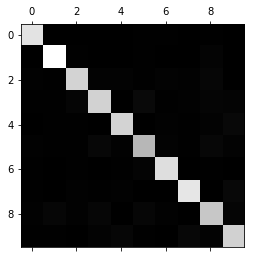

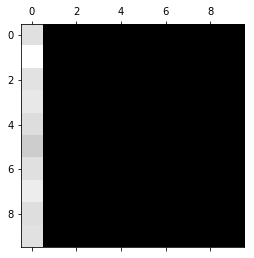

In [15]:
plt.matshow(conf_mx_sgd, cmap=plt.cm.gray)
plt.show()
# Like its explained in the book, we can see that the 5's are darker than the rest.
# Which could mean it performs worse on 5's, or the fact that we know there is only a 10%
# of the dataset that is 5's, which could be affecting the result and scoring here.

# The diagonal for the dumdum confusion matrix
plt.matshow(conf_mx_dumdum, cmap=plt.cm.gray)
plt.show()


SGD confusion matrix:


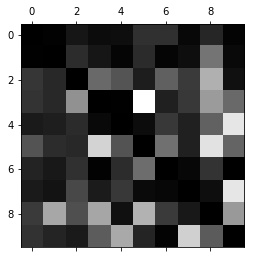


Dummy confusion matrix:


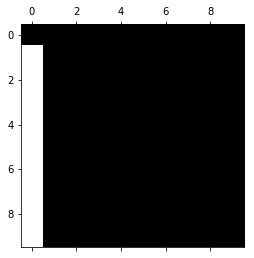

In [20]:
'''
To verify this, wwe divide each value in our confusion matrix above,
by the number of images in the corresponding class. This way we can compare the error rates,
instead of the absolute number of errors in each class.
'''
row_sums_sgd = conf_mx_sgd.sum(axis=1, keepdims=True)
# By dividing each sum we get the norm.
norm_conf_mx_sgd = conf_mx_sgd / row_sums_sgd

# Then as to keep only the errors, we replace all the true values
# in the diagolnal, with zeroes.
np.fill_diagonal(norm_conf_mx_sgd, 0)
plt.matshow(norm_conf_mx_sgd, cmap = plt.cm.gray)
print("\nSGD confusion matrix:")
plt.show()
'''
The rows are represent the "actual classes", and columns the "predicted classes".
With this we can see from column 8 and 9, which are quite bright in colors, comparetivly.
That alot of images are missclassified, as 8s or 9s. 
Furthermore this can also be seen by row 8 and 9, which shows us (by the brightness again),
that 8 and 9 digtis often are confused as other digits.

We can also see that row 1 is quite dark (with the exception of 8th column),
which means for the most part it recognices 1's well and only sometimes,
is confused by some 8 digits.
'''

#Doing the same for the dummy:
row_sums_dumdum = conf_mx_dumdum.sum(axis=1, keepdims=True)
# By dividing each sum we get the norm.
norm_conf_mx_dumdum = conf_mx_dumdum / row_sums_dumdum

# As we can see since it will just say no to everything.
# But we can also see that 0 is apparently not classified correctly ever.
np.fill_diagonal(norm_conf_mx_dumdum, 0)
plt.matshow(norm_conf_mx_dumdum, cmap = plt.cm.gray)
print("\nDummy confusion matrix:")
plt.show()

#### Qe Run a classifier on your data

Finally, try to run a classifier on the data-set you selected previously, perhaps starting with the SGD.

Is it possible to classify at all on your data, or do we need regression instead?

Are you able to do supervised learning, or are there no obvious `y_true` data in your set at all?

If your data is in the form, where you are able to do supervised-classification, could you produce a confusion matrix heatmap, then?

In [ ]:
# TODO: Qe...
